# Part I - Ford GoBike System Data
## by (Victor Obi)

## Introduction
> The datasets explores data obtained from the Ford GoBike system data. It contains 183412 rows and 16 columns and shed light on the bikeshare habits of users around greater San Francisco Bay area between feb 2019 and and march 2019.
  



## Preliminary Wrangling


In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [5]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [12]:
df.duplicated().sum()

0

In [14]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
df.dtypes.value_counts()

float64    7
object     7
int64      2
dtype: int64

In [10]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

### What is the structure of your dataset?

> The dataset has 183412 rows and 16 columns
> The datatypes of the columns are distributed as hown below
- float64 7
- object  7
- int64   2

### What is/are the main feature(s) of interest in your dataset?

> Customer age,
> Customer gender,
> Trip duration,
> Start and End Station,

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- duration_sec
- start_time and end_time
- member_birth_year
- member_gender
- user_type
- bike_share_for_all_trip

### Data Issues
- Start_time and end_time are listed as object datatype
- duration_sec is measured in seconds 
- user_type, member_gender, bike_share_for_all_trip are listed as object datatype
- bike_id, start_station_id and end_station_id are listed float and int datatype
- Age column is missing


### Data Cleaning

In [5]:
# Creating a copy of the dataset 
df1 = df.copy()
# confirming 
df1.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

### Define
- Change start_time and end-time to datetime datatype

### Code

In [6]:
# Changing start-time and end-time to datetime datatype
df1['start_time'] = pd.to_datetime(df1['start_time'])
df1['end_time'] = pd.to_datetime(df1['end_time'])

### Test

In [7]:
# confirming
df1['start_time'].dtype, df1['end_time'].dtype

(dtype('<M8[ns]'), dtype('<M8[ns]'))

### Define
- create a new column for duration in minutes

### Code

In [74]:
# convert duration_sec to duration_mins
df1['duration_mins'] = (df1['duration_sec']) / 60

### Test

In [75]:
# confirming
df1.head(1)

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   

                 end_station_name  end_station_latitude  \
0  Commercial St at Montgomery St             37.794231   

   end_station_longitude  bike_id user_type  member_birth_year member_gender  \
0            -122.402923     4902  Customer             1984.0          Male   

  bike_share_for_all_trip  member_age  duration_mins  
0                      No        35.0         869.75

### Define
- convert user_type, member_gender and bike_share_for_all_trip to categorical datatype

### Code

In [30]:
# Converting user_type, member_gender and bike_share_for_all_trip to cat datatype
df1['user_type'] = df1['user_type'].astype('category')
df1['member_gender'] = df1['member_gender'].astype('category')
df1['bike_share_for_all_trip'] = df1['bike_share_for_all_trip'].astype('category')

### Test

In [76]:
# confirming
df1['user_type'].dtype, df1['member_gender'].dtype, df1['bike_share_for_all_trip'].dtype

(CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=False),
 CategoricalDtype(categories=['Female', 'Male', 'Other'], ordered=False),
 CategoricalDtype(categories=['No', 'Yes'], ordered=False))

### Define
- Convert bike_id, start_station_id and end_station_id to object


### Code

In [78]:
# Converting bike_id, start_station_id and end_station_id to object
df1['bike_id'] = df1['bike_id'].astype(str)
df1['start_station_id'] = df1['start_station_id'].astype(str)
df1['end_station_id'] = df1['end_station_id'].astype(str)


### Test

In [79]:
#confirming
df1['bike_id'].dtype, df1['start_station_id'].dtype, df1['end_station_id'].dtype

(dtype('O'), dtype('O'), dtype('O'))

In [44]:
#Establishing the time frame within which the data was collected
df1['start_time'].min(),df1['start_time'].max(),df1['end_time'].min(),df1['end_time'].max()


(Timestamp('2019-02-01 00:00:20.636000'),
 Timestamp('2019-02-28 23:59:18.548000'),
 Timestamp('2019-02-01 00:04:52.058000'),
 Timestamp('2019-03-01 08:01:55.975000'))

> It appears that the time period spans bewteen feb 2019 to march 2019. In otherwords, this is 1 month worth of bike trips data. 

### Define
- Create a new column for member_age

### Code

In [32]:
# Creating new column for member_age
df1['member_age'] = 2019 - df1['member_birth_year']


### Test

In [80]:
# confirming
df1['member_age']

0         35.0
2         47.0
3         30.0
4         45.0
5         60.0
          ... 
183407    23.0
183408    35.0
183409    29.0
183410    31.0
183411    30.0
Name: member_age, Length: 173467, dtype: float64

> Deep dive into the age column to establish min and max age

In [33]:
#confirming
df1['member_age'].max(), df1['member_age'].min()

(141.0, 18.0)

In [34]:
# aggregating the age column for basic statistical measures
df1['member_age'].describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

> minimum age is 18, maximum age is likely an anomaly.

In [35]:
# computing the 99% percentile
df1['member_age'].describe(percentiles=[.99])
# it appears that 99% of members are under the age of 64. We may have to limit our analysis to age 64 and under

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
50%          32.000000
99%          64.000000
max         141.000000
Name: member_age, dtype: float64

In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

> limit the dataset to users 64 and below

In [36]:
# subsetting for users 64 and below
df1 = df1.query('member_age <= 64')

In [66]:
#confirming result
df1['member_age'].max()

64.0

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173467 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173467 non-null  int64         
 1   start_time               173467 non-null  datetime64[ns]
 2   end_time                 173467 non-null  datetime64[ns]
 3   start_station_id         173467 non-null  object        
 4   start_station_name       173272 non-null  object        
 5   start_station_latitude   173467 non-null  float64       
 6   start_station_longitude  173467 non-null  float64       
 7   end_station_id           173467 non-null  object        
 8   end_station_name         173272 non-null  object        
 9   end_station_latitude     173467 non-null  float64       
 10  end_station_longitude    173467 non-null  float64       
 11  bike_id                  173467 non-null  object        
 12  user_type       

In [68]:
# checking for null values
df1.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id             0
start_station_name         195
start_station_latitude       0
start_station_longitude      0
end_station_id               0
end_station_name           195
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
duration_mins                0
member_age                   0
dtype: int64

In [70]:
# drop columns not required for analysis
df1.drop(columns=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1,  inplace=True)

In [71]:
# confirming
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173467 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             173467 non-null  int64         
 1   start_time               173467 non-null  datetime64[ns]
 2   end_time                 173467 non-null  datetime64[ns]
 3   start_station_id         173467 non-null  object        
 4   start_station_name       173272 non-null  object        
 5   end_station_id           173467 non-null  object        
 6   end_station_name         173272 non-null  object        
 7   bike_id                  173467 non-null  object        
 8   user_type                173467 non-null  category      
 9   member_birth_year        173467 non-null  float64       
 10  member_gender            173467 non-null  category      
 11  bike_share_for_all_trip  173467 non-null  category      
 12  duration_mins   

## Univariate Exploration

#### What is the percentage distribution of fordgo bike users ?

In [72]:
# User type
df1['user_type'].value_counts()

Subscriber    156920
Customer       16547
Name: user_type, dtype: int64

#### Visualization

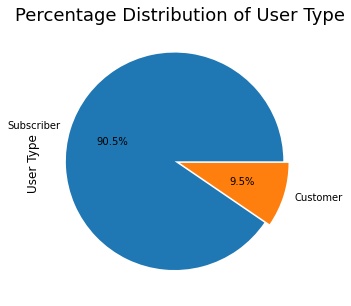

In [82]:
# plotting a pie - chart of usertype

df1['user_type'].value_counts().plot(kind='pie', figsize=(5,5), autopct ='%.1f%%', explode=(0.05, 0));
plt.title('Percentage Distribution of User Type', fontsize=18)
plt.ylabel('User Type', fontsize=12);

#### Observation
- 2 unique user_types were observed
- 90.5% of all users are subscribers while 9.5% are customers

#### What is the age distribution of fordgo bike users ?

#### Visualization

Text(0.5, 0.98, 'Age Distribution of FordGo Bike Users')

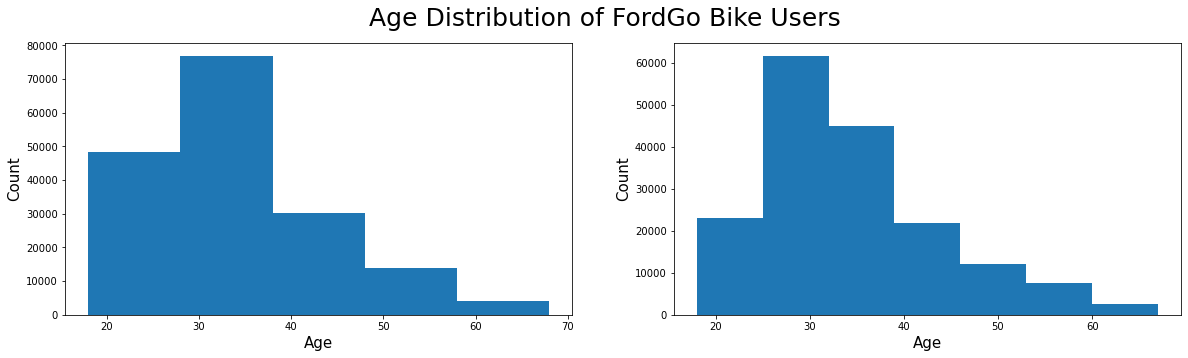

In [89]:
# Age distribution

plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
bins = np.arange(18, df1['member_age'].max()+10, 10)
plt.hist(data=df1, x='member_age', bins=bins)
plt.xlabel('Age',fontsize=15 )
plt.ylabel('Count', fontsize=15)

plt.subplot(1,2,2)
bins = np.arange(18, df1['member_age'].max()+7, 7)
plt.hist(data=df1, x='member_age', bins=bins)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)

plt.suptitle('Age Distribution of FordGo Bike Users', fontsize=25)

#### Observation
- The figure above shows a right skewed distribution. A large chunk of users are between the age of 18 and less than 38.
- The largest age group is between 30-38.

In [104]:
df1['member_gender'].value_counts()

Male      129252
Female     40613
Other       3602
Name: member_gender, dtype: int64

#### What is the distribution of fordgo bike users by gender ?

#### Visualization

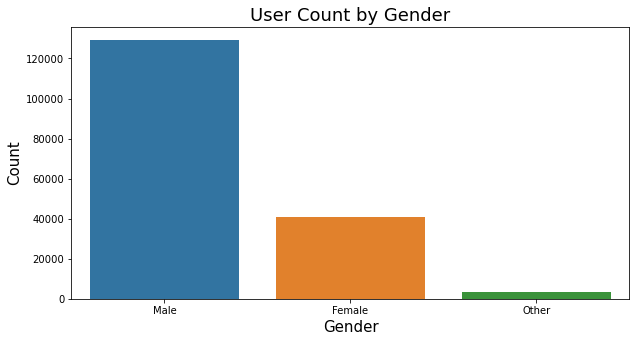

In [90]:
plt.figure(figsize=(10,5))
gender_order = df1['member_gender'].value_counts().index
sb.countplot(data=df1, x='member_gender',order = gender_order )
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('User Count by Gender', fontsize=18);

#### Observation
- 74.5% of users are males
- 23.4% are females

#### What is the distribution of ride duration in mins ?

In [112]:
df1['duration_mins'].describe(), df1['duration_mins'].describe(percentiles=[0.99])

(count    173467.000000
 mean         11.734830
 std          27.444991
 min           1.016667
 25%           5.383333
 50%           8.500000
 75%          13.133333
 max        1409.133333
 Name: duration_mins, dtype: float64,
 count    173467.000000
 mean         11.734830
 std          27.444991
 min           1.016667
 50%           8.500000
 99%          52.944667
 max        1409.133333
 Name: duration_mins, dtype: float64)

> The analysis above shows that 99% of all trip duration is below 52 mins. Trip duration higher than 52 mins may skew the analysis due to outlier effect.

#### Visualization

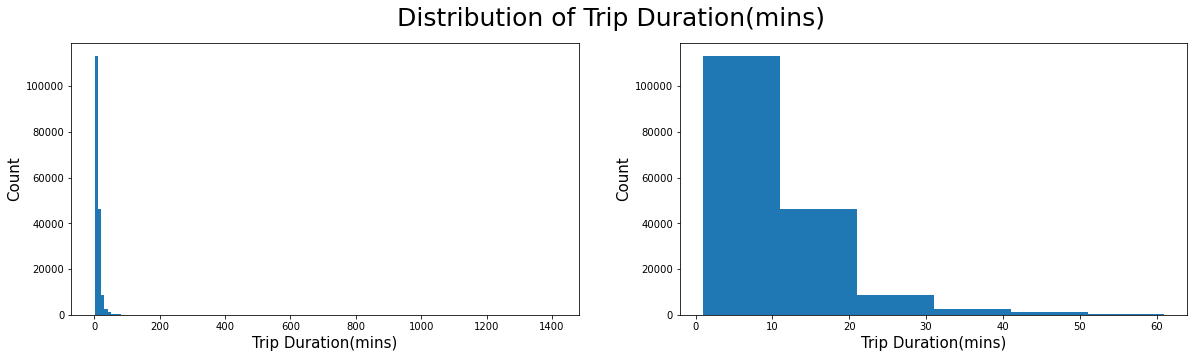

In [93]:
plt.figure(figsize=[20,5])

plt.subplot(1, 2, 1)
bins = np.arange(1, df1['duration_mins'].max()+10, 10)
plt.hist(data=df1, x='duration_mins', bins=bins);
plt.xlabel('Trip Duration(mins)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


plt.subplot(1, 2, 2)
bins = np.arange(1, 52+10, 10)
plt.hist(data=df1, x='duration_mins', bins=bins)
plt.xlabel('Trip Duration(mins)', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.suptitle('Distribution of Trip Duration(mins)', fontsize=25);

#### Observation
- The trip distribution is right skewed.
- 99% of all trips are less than 52 mins

#### What is the percentage distribution of users bike share habits?

In [121]:
# computing distribution bike share habits
df1['bike_share_for_all_trip'].value_counts()

No     156384
Yes     17083
Name: bike_share_for_all_trip, dtype: int64

#### Visualization

Text(0, 0.5, 'bike share for all trip')

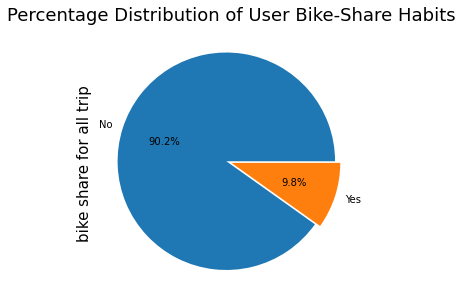

In [91]:
df1['bike_share_for_all_trip'].value_counts().plot(kind='pie', figsize=(10,5), autopct ='%.1f%%', explode=(0.05, 0));
plt.title('Percentage Distribution of User Bike-Share Habits', fontsize=18);
plt.ylabel('bike share for all trip', fontsize=15)

#### Observation
- 90.2% of all users do not use bike share for all trips
- 9.8% use bike share for all trips

#### What is the hourly trip count?

In [95]:
df1['start_time'].dt.hour.value_counts()

17    20798
8     20137
18    16017
9     15075
16    13353
7     10169
19     9377
15     8515
12     8125
13     7962
10     7873
14     7565
11     7354
20     6198
21     4384
6      3247
22     2777
23     1571
0       891
5       834
1       523
2       355
4       207
3       160
Name: start_time, dtype: int64

#### Visualization

Text(0.5, 1.0, 'Top 7 Trip Count by Start Hour')

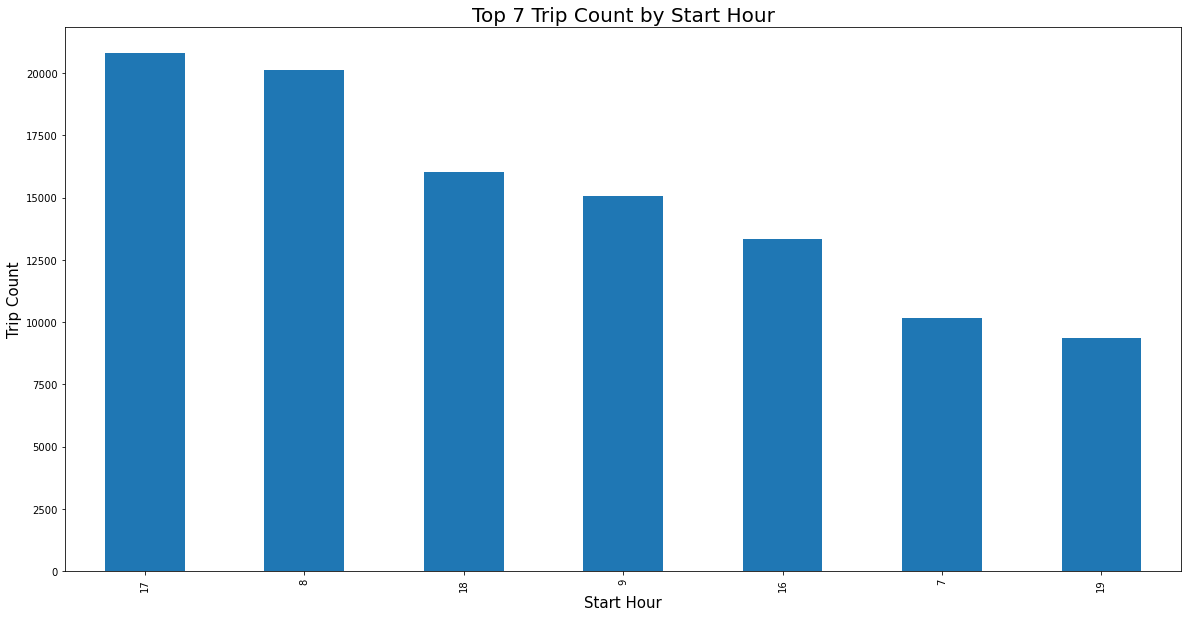

In [98]:
plt.figure(figsize=(5,3))
df1['start_time'].dt.hour.value_counts().head(7).plot(kind='bar', figsize=(20,10))
plt.xlabel('Start Hour', fontsize=15)
plt.ylabel('Trip Count', fontsize=15)
plt.title('Top 7 Trip Count by Start Hour', fontsize=20)

#### Observation
- Top hourly trip count happens at 5pm, 8am, 6pm and 9am
- 4pm, 7am and 7pm are 5th, 6th and 7th respectively

#### What is the trip count by day of the month?

In [129]:
df1['start_time'].dt.day.value_counts()

28    9384
20    9163
21    9033
19    9027
7     8724
22    8667
6     8584
11    8281
12    8101
5     8060
27    7400
15    6905
25    6693
14    6281
8     6049
1     5787
18    5235
4     5223
26    5166
23    5087
24    4170
17    3833
16    3692
10    3658
13    3062
2     2983
3     2676
9     2543
Name: start_time, dtype: int64

#### Visualization

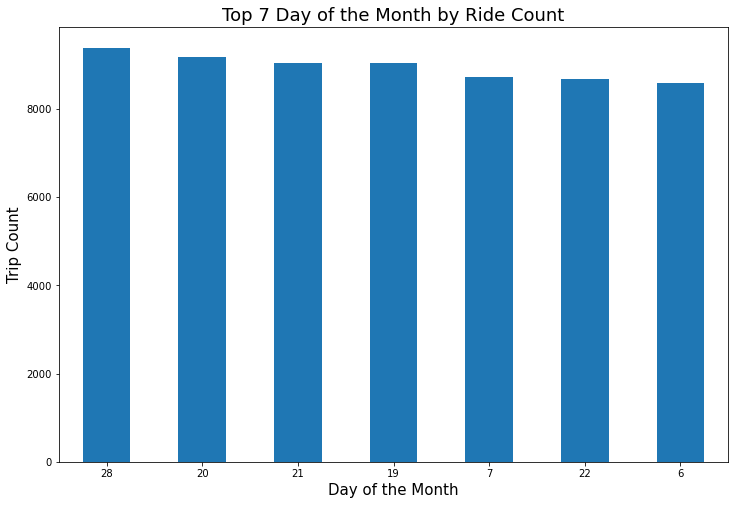

In [99]:
df1['start_time'].dt.day.value_counts().head(7).plot(kind='bar', figsize=(12,8))
plt.xlabel('Day of the Month', fontsize=15)
plt.ylabel('Trip Count', fontsize=15)
plt.title('Top 7 Day of the Month by Ride Count', fontsize=18)
plt.xticks(rotation=360);

#### Observation
- 28th, 20th and 21st have the top 3 trip count by day of the month.

#### What is the trip count by day of the week?

In [137]:
df1['start_time'].dt.day_name().value_counts()

Thursday     33422
Tuesday      30354
Wednesday    28209
Friday       27408
Monday       25432
Sunday       14337
Saturday     14305
Name: start_time, dtype: int64

#### Visualization

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Thursday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Friday'),
  Text(4, 0, 'Monday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Saturday')])

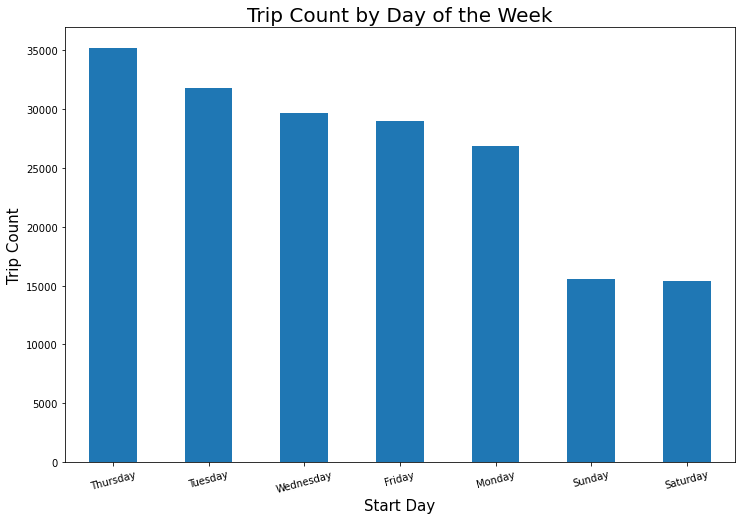

In [9]:
df1['start_time'].dt.day_name().value_counts().plot(kind='bar', figsize=(12,8))
plt.xlabel('Start Day', fontsize=15)
plt.ylabel('Trip Count', fontsize=15)
plt.title('Trip Count by Day of the Week', fontsize=20);
plt.xticks(rotation=15)

#### Observation
- Thursdays records the most trips
- Tuesdays and Wednesdays are close second and third respectively

#### What is the trip duration  by day of the week?

In [107]:
df1.groupby(df1['start_time'].dt.day_name())['duration_mins'].mean().sort_values(ascending=False)


start_time
Sunday       14.319623
Saturday     14.159372
Monday       11.625927
Friday       11.353135
Thursday     11.313088
Wednesday    11.080971
Tuesday      10.879262
Name: duration_mins, dtype: float64

#### Visualization

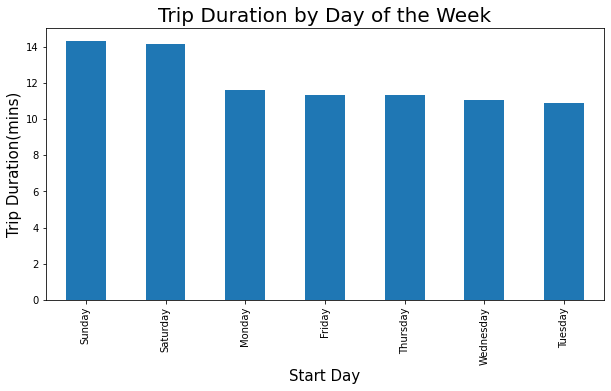

In [106]:
df1.groupby(df1['start_time'].dt.day_name())['duration_mins'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.xlabel('Start Day', fontsize=15)
plt.ylabel('Trip Duration(mins)', fontsize=15)
plt.title('Trip Duration by Day of the Week', fontsize=20);

#### Observation
- Sunday and Saturday accounts for the top 2 trip duration.

In [131]:
df1.groupby(df1['start_time'].dt.hour).mean()

duration_sec  member_birth_year  duration_mins  member_age
start_time                                                            
0             809.712682        1988.147026      13.495211   30.852974
1             649.606119        1988.332696      10.826769   30.667304
2            1064.630986        1989.388732      17.743850   29.611268
3            1495.643750        1985.987500      24.927396   33.012500
4             725.072464        1978.531401      12.084541   40.468599
5             599.642686        1983.525180       9.994045   35.474820
6             532.647059        1983.195565       8.877451   35.804435
7             611.689153        1983.876881      10.194819   35.123119
8             656.259423        1984.344987      10.937657   34.655013
9             651.444842        1985.070381      10.857414   33.929619
10            696.183666        1985.307888      11.603061   33.692112
11            799.708730        1985.145091      13.328479   33.854909
12            776.270031        1984.978708      12.937834   34.021292
13            832.673700        1985.176840      13.877895   33.823160
14            827.979775        1985.500859      13.799663   33.499141
15            816.319319        1984.685731      13.605322   34.314269
16            723.819516        1984.171871      12.063659   34.828129
17            704.574671        1984.799740      11.742911   34.200260
18            642.402198        1985.657489      10.706703   33.342511
19            685.997227        1986.890583      11.433287   32.109417
20            675.316715        1987.410616      11.255279   31.589384
21            713.977190        1987.334170      11.899620   31.665830
22            613.603169        1988.146921      10.226719   30.853079
23            794.467855        1987.053469      13.241131   31.946531

In [135]:
df1.groupby(df1['start_time'].dt.hour)['duration_mins'].mean().sort_values()

start_time
6      8.877451
5      9.994045
7     10.194819
22    10.226719
18    10.706703
1     10.826769
9     10.857414
8     10.937657
20    11.255279
19    11.433287
10    11.603061
17    11.742911
21    11.899620
16    12.063659
4     12.084541
12    12.937834
23    13.241131
11    13.328479
0     13.495211
15    13.605322
14    13.799663
13    13.877895
2     17.743850
3     24.927396
Name: duration_mins, dtype: float64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Preliminary analysis showed 2 unique user types- subscribers and customers. Users age shows most users are between 18 to less than 38 years with 30-38 forming the largest age bracket. 74.5% of users are male compared to 23.4% of users. A plot of trip duration showed that most trips stayed under 52 mins. Bike share habits showed that only 9.8% of all users indicated that they used bike share for all trips compared to 90.2% who said no. Hourly trips is highest at 5pm, 8am and 6pm. Day of the month trip is highest on the 28th, 20th and 21st. Thursdays account for the highest day of the week trips followed by Tuesday and Wednesday.
Age and Trip duration showed unusual points that required transformation.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> A couple unusual points were identified. Members age column showed abnormal numbers with the max being 141 years. Further analysis indicated that 99% of all users are below 64 years. Consequently, the dataset was transformed to limit the analysis to users 64 years and below.
Also, trip duration showed a few outliers which had to be excluded from the analysis because 99% of all trip duration stayed below 52mins.


## Bivariate Exploration

#### What is the relationship between age and trip duration?

#### Visualization

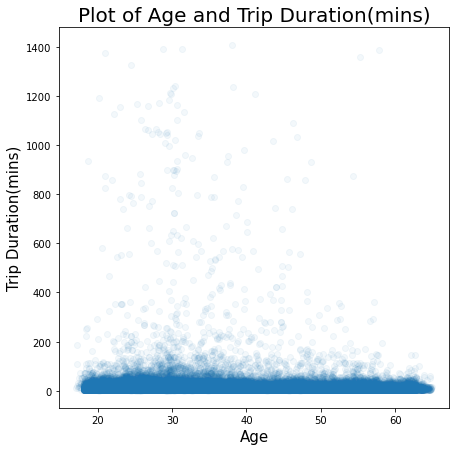

In [111]:
plt.figure(figsize=[7,7])
sb.regplot(data=df1, x='member_age', y='duration_mins',x_jitter = 0.9, scatter_kws={'alpha':1/20})
plt.xlabel('Age', fontsize=15)
plt.ylabel('Trip Duration(mins)', fontsize=15)
plt.title('Plot of Age and Trip Duration(mins)', fontsize=20);


#### Observation
- A large proportion trips stayed under 52 mins

#### What is the breakdown of Trip count  by gender and user type?

#### Visualization

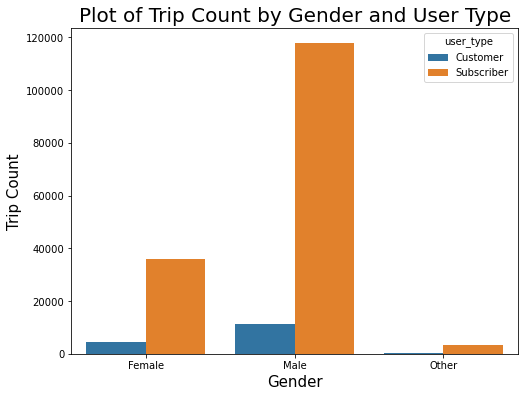

In [112]:
plt.figure(figsize=[8,6])
sb.countplot(data=df1, x='member_gender', hue='user_type')
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Trip Count', fontsize=15)
plt.title('Plot of Trip Count by Gender and User Type', fontsize=20);


#### Observation
- More male users are subsribers compared to male users who are customers
- More female users are subscribers as well
- Male subscribers account for a large portion of all trip counts compared to female subscribers

#### Does User_type and Gender affect Trip duration?

#### Visualization

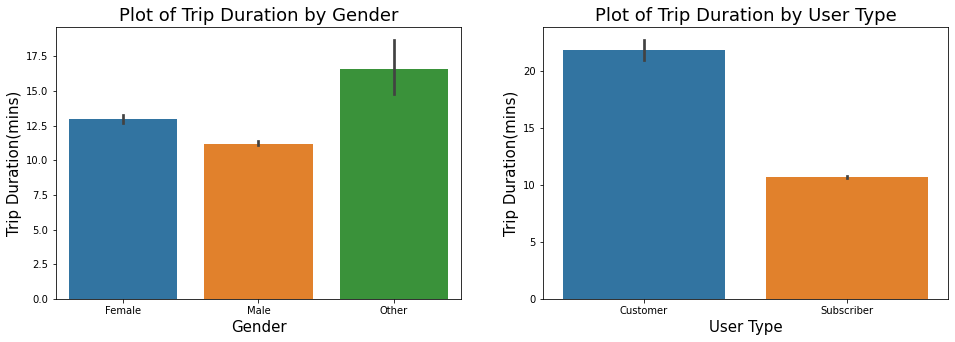

In [113]:
fig, axes = plt.subplots(1,2, figsize=(16,5), sharey=True)

plt.subplot(1,2,1)
sb.barplot(data=df1, x='member_gender', y='duration_mins')
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Trip Duration(mins)', fontsize=15)
plt.title('Plot of Trip Duration by Gender', fontsize=18);

plt.subplot(1,2,2)
sb.barplot(data=df1, x='user_type', y='duration_mins')
plt.xlabel('User Type', fontsize=15)
plt.ylabel('Trip Duration(mins)', fontsize=15)
plt.title('Plot of Trip Duration by User Type', fontsize=18);



#### Observation
- Female users logged in more ride time than male users
- Customers logged in more ride time than subscribers

#### What is the relationship between trip duration and start hour?

#### Visualization

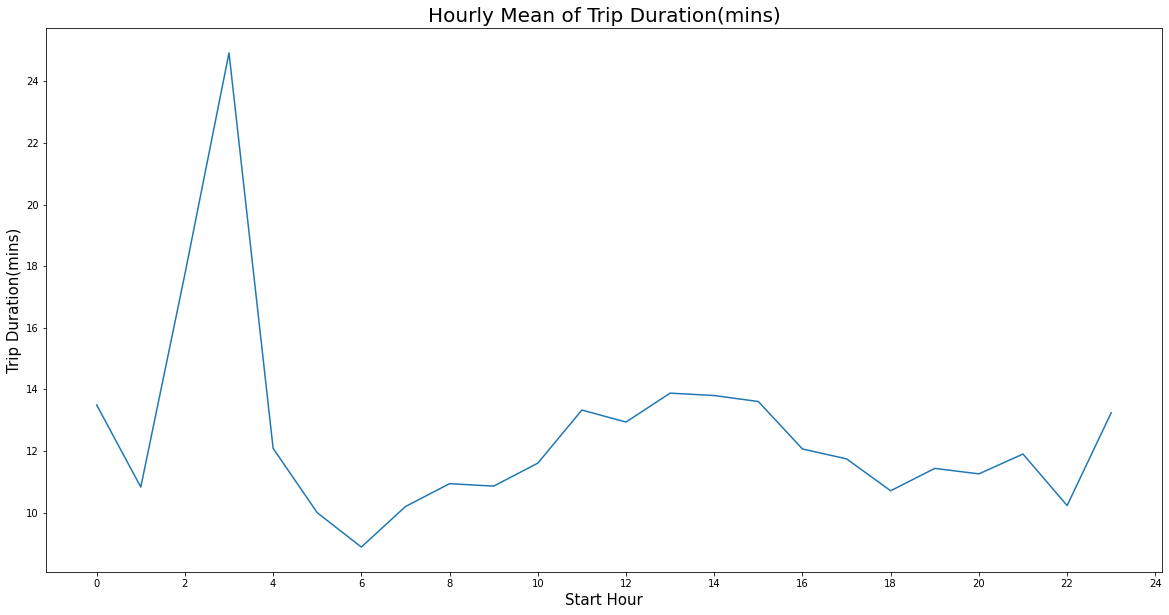

In [114]:

df1.groupby(df1['start_time'].dt.hour)['duration_mins'].mean().plot(kind='line', figsize=(20,10))
plt.xticks([x for x in range(0,25,2)])
plt.xlabel('Start Hour', fontsize=15)
plt.ylabel('Trip Duration(mins)', fontsize=15);
plt.title('Hourly Mean of Trip Duration(mins)', fontsize=20);

#### Observation
- Trip duration peaked at 2am with a sharp drop at 5am.
- It fluctuates between 7 am and 10pm.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The analysis established that 99% of users are below that age of 64 with 99% of ride duration staying under 52mins.
A substantial portion of all subscribers are male. Also, a large portion of all customers are males.
Male subscribers account for over 70% of all trips.Female users logged in more trip time compared to male users.
Customers account for more than 60% of all trip duration compared to subscribers.Trip duration is highest at 2am.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Users who did not identify their gender logged in the most trip time.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Breakdown of trip duration by gender and user type 

#### Visualization

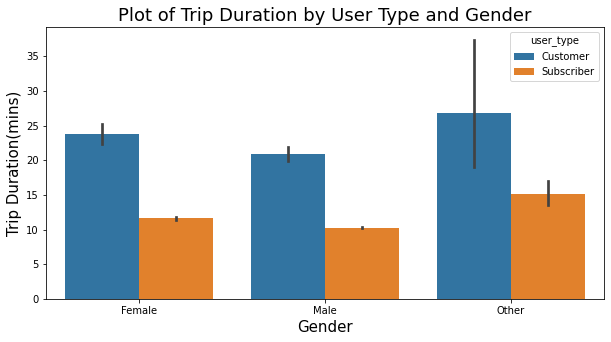

In [118]:
plt.figure(figsize=(10,5))
sb.barplot(data=df1, x='member_gender', y='duration_mins', hue='user_type')
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Trip Duration(mins)', fontsize=15)
plt.title('Plot of Trip Duration by User Type and Gender', fontsize=18);

#### Observation
- Customers of all gender logged in more trip time compared to subscribers of all genders


#### Breakdown of trip duration by gender and user type 

#### Visualization

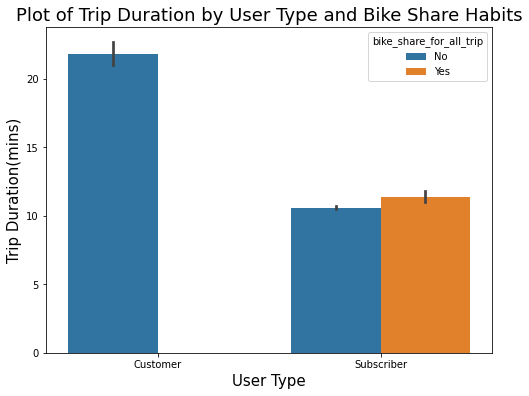

In [117]:

plt.figure(figsize=[8,6])
sb.barplot(data=df1, x='user_type', y='duration_mins',hue='bike_share_for_all_trip')
plt.xlabel('User Type', fontsize=15)
plt.ylabel('Trip Duration(mins)', fontsize=15)
plt.title('Plot of Trip Duration by User Type and Bike Share Habits', fontsize=18);



#### Observation
- About 50% of all subscribers use bike share for all trips while the other 50% do not
- 100% of customers do not use bike share for all trips

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It is interesting to observe that customers of all genders logged in mopre trip time compared to subscribers of all genders. About 50% of all subscribers use bike share for all trips while the other 50% do not.Finally, 100% of customers admitted to not using bike share for all trips.

### Were there any interesting or surprising interactions between features?

> More female customers logged in more trip time compared to male customers. Same applies to female subscribers compared to male subscribers.

## Conclusions
> The environment benefits immensely from clean energy transport systems that release little to zero carbondioxide. My analysis showed two unique users - Subscribers and Customers. Age of users range from 18 - 64 with most users within the 30-38 age bracket. Trip count is highest on Thursdays with most trips happening at 5pm, 8am and 6pm. 28th, 20th and 21st records the highest day of the month trips.
> Limitations of this study is solely based on the fact that the data covers just 1 month. A few more months may uncover seasonal and cyclical trends.
> I wish to state that the analysis will require more statiscal test to validate the results.
